In [1]:
using StaticArrays
using CoordinateTransformations
using GeometryTypes
const gt = GeometryTypes
using DrakeVisualizer
using BenchmarkTools
import EnhancedGJK

adding: /Users/rdeits/.julia/v0.5/DrakeVisualizer/src/lcmtypes to the python path


In [22]:
reload("EnhancedGJK")

In [23]:
simplex = SVector{3}(SVector{2, Float64}[[1., 0], [2., 0], [1., 1]])
pt = SVector(0., 0)
cache = EnhancedGJK.CollisionCache(simplex, pt);
t = IdentityTransformation()
# EnhancedGJK.gjk!(cache, IdentityTransformation(), IdentityTransformation())

CoordinateTransformations.IdentityTransformation()

In [24]:
@benchmark EnhancedGJK.transform_simplex($cache, $t, $t)

BenchmarkTools.Trial: 
  memory estimate:  0.00 bytes
  allocs estimate:  0
  --------------
  minimum time:     11.866 ns (0.00% GC)
  median time:      11.910 ns (0.00% GC)
  mean time:        12.209 ns (0.00% GC)
  maximum time:     22.345 ns (0.00% GC)
  --------------
  samples:          10000
  evals/sample:     999
  time tolerance:   5.00%
  memory tolerance: 1.00%

In [5]:
mesh = DrakeVisualizer.contour_mesh(x -> sum((x - [2, -1.5, 0]).^2) - 1, [-1.5, -1.5, -1.5], [1.5, 1.5, 1.5])
acc = EnhancedGJK.NeighborMesh(mesh)
pt = Vec(0., 0, 0)

Vec(0.0,0.0,0.0)

In [ ]:
cache = EnhancedGJK.CollisionCache(acc, pt)
simplex, best_pt, in_interior = EnhancedGJK.gjk!(cache, IdentityTransformation(), IdentityTransformation())

In [16]:
t = IdentityTransformation()
@code_warntype Gjk2.gjk!(Val{3}, cache, t, t)

Variables:
  #self#::Gjk2.#gjk!
  #unused#::Type{Val{3}}
  cache::Gjk2.CollisionCache{Gjk2.AcceleratedMesh{3,Float64,GeometryTypes.HomogenousMesh{FixedSizeArrays.Point{3,Float64},GeometryTypes.Face{3,Int64,0},Void,Void,Void,Void,Void}},FixedSizeArrays.Vec{3,Float64},4,Gjk2.Difference{Gjk2.Tagged{StaticArrays.SVector{3,Float64},Int64},Gjk2.Tagged{StaticArrays.SVector{3,Float64},Void}},Gjk2.Difference{StaticArrays.SVector{3,Float64},StaticArrays.SVector{3,Float64}}}
  poseA::CoordinateTransformations.IdentityTransformation
  poseB::CoordinateTransformations.IdentityTransformation
  max_iter::Int64
  atol::Float64
  origin::StaticArrays.SVector{3,Float64}
  rotAinv::UniformScaling{Int64}
  rotBinv::UniformScaling{Int64}
  simplex::StaticArrays.MVector{4,StaticArrays.SVector{3,Float64}}
  in_interior::Bool
  best_point::StaticArrays.SVector{3,Float64}
  #temp#@_14::Int64
  k::Int64
  weights::StaticArrays.SVector{4,Float64}
  index_to_replace::Int64
  direction::StaticArrays.SVector{3,Floa

In [17]:
t = IdentityTransformation()
@benchmark Gjk2.gjk!($cache, $t, $t)

BenchmarkTools.Trial: 
  memory estimate:  1.39 kb
  allocs estimate:  43
  --------------
  minimum time:     2.367 μs (0.00% GC)
  median time:      2.623 μs (0.00% GC)
  mean time:        2.900 μs (7.07% GC)
  maximum time:     433.367 μs (98.04% GC)
  --------------
  samples:          10000
  evals/sample:     9
  time tolerance:   5.00%
  memory tolerance: 1.00%

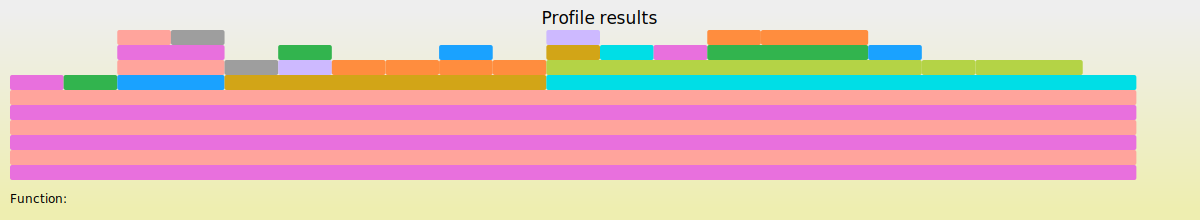

In [26]:
Profile.clear()
@profile for i = 1:10000; Gjk2.gjk!(cache, t, t); end
ProfileView.view()

In [ ]:
s = Simplex(Vec(2., -1), Vec(2.5, 0), Vec(2., 1), Vec(1., 1), Vec(1., -1))
p = Vec(0., 0)
cache = Gjk2.CollisionCache(s, p)

simplex, best_pt = Gjk2.gjk!(cache, IdentityTransformation(), IdentityTransformation())

In [126]:
simplex, best_pt = Gjk2.gjk!(cache, IdentityTransformation(), IdentityTransformation())

(GeometryTypes.FlexibleSimplex{FixedSizeArrays.Vec{2,Float64}}(2-elementArray{FixedSizeArrays.Vec{2,Float64},1}:
 Vec(1.0,1.0)
 Vec(1.0,-1.0)
),1.0,false)

In [127]:
Gjk2.signed_distance!(cache, IdentityTransformation(), Translation(SVector(1.1, 0)))

-0.10000000000000009

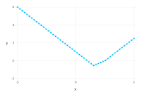

In [128]:
xs = linspace(-5, 5)
dists = [Gjk2.signed_distance!(cache, IdentityTransformation(), Translation(SVector(x, 0))) for x in xs]
plot(x=xs, y=dists, Geom.point, Geom.line)

In [129]:
t1 = IdentityTransformation()
t2 = IdentityTransformation()

@benchmark Gjk2.gjk!($cache, $t1, $t2)

BenchmarkTools.Trial: 
  samples:          10000
  evals/sample:     32
  time tolerance:   5.00%
  memory tolerance: 1.00%
  memory estimate:  1.41 kb
  allocs estimate:  40
  minimum time:     917.00 ns (0.00% GC)
  median time:      1.20 μs (0.00% GC)
  mean time:        1.64 μs (23.35% GC)
  maximum time:     211.88 μs (98.56% GC)